In [ ]:
####导入数据，找到配对股票
# import costF
# from random import uniform
# from random import randint 
# import math
# import numpy as np
# import matplotlib.pyplot as plt
# '''
# 根据levy飞行计算新的巢穴位置
# '''
# fitness = costF.fitness
# def GetNewNestViaLevy(Xt,Xbest,Lb,Ub,lamuda):
#     beta = 1.5
#     sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) / (
#                 math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)
#     sigma_v = 1
#     for i in range(Xt.shape[0]):
#         s = Xt[i,:]
#         u = np.random.normal(0, sigma_u, 1)
#         v = np.random.normal(0, sigma_v, 1)
#         Ls = u / ((abs(v)) ** (1 / beta))
#         stepsize = lamuda*Ls*(s-Xbest)   #lamuda的设置关系到点的活力程度  方向是由最佳位置确定的  有点类似PSO算法  但是步长不一样
#         s = s + stepsize * np.random.randn(1, len(s))  #产生满足正态分布的序列
#         Xt[i, :] = s
#         Xt[i,:] = simplebounds(s,Lb,Ub)
#     return Xt
# '''
# 按pa抛弃部分巢穴
# '''
# def empty_nests(nest,Lb,Ub,pa):
#     n = nest.shape[0]
#     nest1 = nest.copy()
#     nest2 = nest.copy()
#     rand_m =pa - np.random.rand(n,nest.shape[1])
#     rand_m = np.heaviside(rand_m,0)
#     np.random.shuffle(nest1)
#     np.random.shuffle(nest2)
#     # stepsize = np.random.rand(1,1) * (nest1 - nest)
#     stepsize = np.random.rand(1,1) * (nest1 - nest2)
#     new_nest = nest + stepsize * rand_m
#     nest = simplebounds(new_nest,Lb,Ub)
#     return nest
# '''
# 获得当前最优解
# '''
# def get_best_nest(nest, newnest,Nbest,nest_best):
#     fitall = 0
#     for i in range (nest.shape[0]):
#         temp1 = fitness(nest[i,:])
#         temp2 = fitness(newnest[i,:])
#         if temp1 > temp2:
#             nest[i, :] = newnest[i,:]
#             if temp2 < Nbest :
#                 Nbest = temp1
#                 nest_best = nest[i,:]
#             fitall = fitall + temp2
#         else:
#             fitall = fitall + temp1
#     meanfit = fitall/nest.shape[0]
#     return  nest , Nbest , nest_best ,meanfit

# '''
# 约束迭代结果
# '''
# def simplebounds(s,Lb,Ub):
#     for i in range(s.shape[0]):
#         for j in range(s.shape[1]):
#             if s[i][j] < Lb[j]:
#                 s[i][j] = Lb[j]
#             if s[i][j] > Ub[j]:
#                 s[i][j] = Ub[j]
#     return s
 
# def Get_CS(Lb,Ub,maxgen):
#     '''
#     Lb - 优化变量下边界 eg. Lb = [-1, -1, -0.1]
#     Ub - 优化变量上边界 eg. Ub = [3, 5, 10]
#     maxgen - 迭代次数
#     '''

#     population_size = 20 # 布谷鸟种群数
#     lamuda = 1
#     pa =0.25
#     costfmin = []
#     bestpop = []
#     dim = len(Lb)
#     nest = np.array(Lb) + (np.array(Ub)-np.array(Lb))*np.random.uniform(0, 1,(population_size,dim))  # 初始化位置
#     nest_best = nest[0,:]
#     Nbest =fitness(nest_best)
#     nest ,Nbest, nest_best ,fitmean = get_best_nest(nest,nest,Nbest,nest_best)
#     for i in range (maxgen):
#         nest_c = nest.copy()
#         newnest = GetNewNestViaLevy(nest_c, nest_best, Lb, Ub,lamuda) # 根据莱维飞行产生新的位置
 
#         nest,Nbest, nest_best ,fitmean = get_best_nest(nest, newnest,Nbest, nest_best) # 判断新的位置优劣进行替换
 
#         nest_e = nest.copy()
#         newnest = empty_nests(nest_e,Lb,Ub,pa) #丢弃部分巢穴
 
#         nest,Nbest, nest_best ,fitmean = get_best_nest(nest,newnest, Nbest, nest_best)  # 再次判断新的位置优劣进行替换
 
#         costfmin.append(Nbest)
#         bestpop.append(nest_best)
#         print("第",i,"次迭代，最优解的适应度函数值",Nbest)

#     return  costfmin, bestpop


# Lb = [-10,-10]
# Ub = [10,10]
# maxgen = 30
# costfmin, bestpop = Get_CS(Lb=Lb,Ub=Ub,maxgen=maxgen)
# plt.plot(costfmin)
# plt.xlabel('time')
# plt.ylabel('cost function')
# plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from jqdatasdk import *
from settings import nest

# auth('18827513013','513013')

auth success 


In [42]:
# 获取沪深300指数成分股 前复权后的历史股价 副本1.csv 
index = '000300.XSHG'
start = '2017-11-1'
end   = '2019-10-31'
# code_list = get_index_stocks(index)
# index_df = get_price(code_list, start, end, fields='close').close
# index_df.to_csv('./副本1.csv')
index_df = pd.read_csv('./aa.csv', index_col= 0, header= 0)
index_df.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,...,603156.XSHG,603160.XSHG,603259.XSHG,603260.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603986.XSHG,603993.XSHG
2017-11-01,11.11,26.96,31.58,8.13,3.98,4.22,5.48,48.16,7.88,10.71,...,NaN,111.99,NaN,23.73,48.69,53.46,118.36,38.49,115.82,6.97
2017-11-02,11.25,27.24,32.12,8.19,3.99,4.12,5.52,48.76,7.88,10.65,...,NaN,111.85,NaN,26.10,49.28,52.49,116.91,38.89,115.82,6.73
2017-11-03,11.10,26.07,32.75,7.98,4.05,4.09,5.47,48.20,7.55,10.42,...,NaN,109.61,NaN,28.71,49.49,52.79,117.01,37.83,115.82,6.63
2017-11-06,10.99,25.40,34.00,7.70,4.42,4.15,5.46,50.14,8.07,10.40,...,NaN,113.65,NaN,31.59,52.33,50.51,121.52,38.38,115.82,6.62
2017-11-07,11.62,25.76,33.65,7.68,4.54,4.16,5.51,50.20,8.01,10.44,...,NaN,113.65,NaN,34.75,52.93,50.12,121.27,38.16,115.82,6.63


In [43]:
len(index_df)   #总共有487行数据

487

In [44]:
df=index_df.dropna(axis = 1)    #axis = 1代表删除缺失值所在的列，这个案例里，删除了有缺失值的股票代码    
df.to_csv('./副本2.csv')             #dropna默认删除缺失值所在的行，也就是默认axis=0
df.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,...,601998.XSHG,603019.XSHG,603160.XSHG,603260.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603986.XSHG,603993.XSHG
2017-11-01,11.11,26.96,31.58,8.13,3.98,4.22,5.48,48.16,7.88,10.71,...,5.67,30.24,111.99,23.73,48.69,53.46,118.36,38.49,115.82,6.97
2017-11-02,11.25,27.24,32.12,8.19,3.99,4.12,5.52,48.76,7.88,10.65,...,5.63,30.02,111.85,26.10,49.28,52.49,116.91,38.89,115.82,6.73
2017-11-03,11.10,26.07,32.75,7.98,4.05,4.09,5.47,48.20,7.55,10.42,...,5.64,30.81,109.61,28.71,49.49,52.79,117.01,37.83,115.82,6.63
2017-11-06,10.99,25.40,34.00,7.70,4.42,4.15,5.46,50.14,8.07,10.40,...,5.62,31.49,113.65,31.59,52.33,50.51,121.52,38.38,115.82,6.62
2017-11-07,11.62,25.76,33.65,7.68,4.54,4.16,5.51,50.20,8.01,10.44,...,5.68,34.64,113.65,34.75,52.93,50.12,121.27,38.16,115.82,6.63


In [45]:
np.isnan(df).any().sum() #检查数据集里是否还有缺失值

0

In [46]:
df_log=np.log(df)   #对数据取对数
df_log.to_csv('./副本对数.csv')
df_log.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,...,601998.XSHG,603019.XSHG,603160.XSHG,603260.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603986.XSHG,603993.XSHG
2017-11-01,2.407846,3.294354,3.452524,2.095561,1.381282,1.439835,1.701105,3.874529,2.064328,2.371178,...,1.735189,3.409166,4.718410,3.166740,3.885474,3.978934,4.773731,3.650398,4.752037,1.941615
2017-11-02,2.420368,3.304686,3.469479,2.102914,1.383791,1.415853,1.708378,3.886910,2.064328,2.365560,...,1.728109,3.401864,4.717159,3.261935,3.897518,3.960623,4.761404,3.660737,4.752037,1.906575
2017-11-03,2.406945,3.260785,3.488903,2.076938,1.398717,1.408545,1.699279,3.875359,2.021548,2.343727,...,1.729884,3.427839,4.696929,3.357245,3.901771,3.966322,4.762259,3.633102,4.752037,1.891605
2017-11-06,2.396986,3.234749,3.526361,2.041220,1.486140,1.423108,1.697449,3.914819,2.088153,2.341806,...,1.726332,3.449670,4.733124,3.452841,3.957570,3.922171,4.800079,3.647536,4.752037,1.890095
2017-11-07,2.452728,3.248823,3.516013,2.038620,1.512927,1.425515,1.706565,3.916015,2.080691,2.345645,...,1.736951,3.545009,4.733124,3.548180,3.968970,3.914420,4.798019,3.641788,4.752037,1.891605


In [47]:
train=df_log.loc["2017-11-1":"2018-10-31"]#2017-11-01至2018-10-31为训练+验证数据，共244个数据（先用这部分数据选出相关系数高的股票对）  
train.to_csv('./副本train.csv')         
train.head()
train.tail()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,...,601998.XSHG,603019.XSHG,603160.XSHG,603260.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603986.XSHG,603993.XSHG
2018-10-25,2.413232,3.117065,2.858766,1.702928,0.867100,1.156881,1.497388,3.670206,2.001480,1.813195,...,1.747459,3.392829,4.320816,3.491952,4.223470,3.271089,4.244631,2.981126,4.229604,1.308333
2018-10-26,2.403335,3.130700,2.847812,1.713798,0.867100,1.160021,1.479329,3.670206,2.013569,1.834180,...,1.738710,3.375538,4.329285,3.501646,4.160132,3.275634,4.274581,2.971440,4.229604,1.319086
2018-10-29,2.364620,3.087399,2.859340,1.673351,0.854415,1.141033,1.465568,3.564732,1.989243,1.822935,...,1.722767,3.372112,4.333755,3.470101,4.054737,3.196630,4.228584,2.964757,4.229604,1.297463
2018-10-30,2.378620,3.125444,2.826722,1.706565,0.871293,1.153732,1.504077,3.566429,1.986504,1.838961,...,1.736951,3.365225,4.333099,3.487681,4.061305,3.228430,4.266195,2.972975,4.229604,1.329724
2018-10-31,2.379546,3.148024,2.829087,1.710188,0.879627,1.166271,1.483875,3.585739,1.972691,1.835776,...,1.738710,3.384729,4.384773,3.542408,4.156537,3.252697,4.292375,2.992226,4.229604,1.376244


In [48]:
len(train)

237

In [49]:
test=df_log.loc["2018-11-1":,]   #用来预测
test.head()

,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,...,601998.XSHG,603019.XSHG,603160.XSHG,603260.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603986.XSHG,603993.XSHG
2018-11-12,2.346602,3.133754,3.005683,1.738710,0.900161,1.229641,1.481605,3.666122,1.978239,1.909543,...,1.704748,3.422306,4.358246,3.535145,4.164182,3.336481,4.385521,3.012098,4.217299,1.401183
2018-11-13,2.344686,3.135929,3.010621,1.745716,0.928219,1.244155,1.504077,3.694613,1.983756,1.921325,...,1.706565,3.402197,4.349374,3.545009,4.166045,3.344627,4.396915,3.023834,4.214052,1.408545
2018-11-14,2.335052,3.145014,2.989211,1.745716,0.920283,1.249902,1.497388,3.683867,1.978239,1.925707,...,1.697449,3.408835,4.341074,3.542697,4.138042,3.323596,4.383401,3.012098,4.300274,1.393766
2018-11-15,2.352327,3.154444,3.005683,1.754404,0.928219,1.272566,1.515127,3.690129,1.985131,1.934416,...,1.708378,3.457578,4.346788,3.578786,4.149937,3.339677,4.440649,3.033028,4.309322,1.403643
2018-11-16,2.347558,3.170526,3.081451,1.785070,0.932164,1.278152,1.539015,3.711619,1.997418,1.951608,...,1.711995,3.465423,4.372103,3.570377,4.134847,3.352007,4.470495,3.034953,4.363990,1.403643


In [50]:
len(test)

236

In [51]:
import pandas as pd             # 计算每支股票与其余股票的相关系数，降序排列
from numpy import nan           # 相关系数相等的两支股票即为配对股票 
import numpy as np              # 没有组成配对的股票是由于它与已组成配对的股票的相关系数低于已组成的股票对的相关系数
corr_df = train.corr()
corr_df[corr_df==1] = nan
corr_df = pd.DataFrame(corr_df.max().sort_values(ascending=False).head(10), columns=['corr'])
corr_df['name'] = [get_security_info(code).display_name for code in corr_df.index]
corr_df['industry'] = [get_industry(code) for code in corr_df.index] 
corr_df.to_csv('./副本配对股票1.csv')
corr_df                    #得到配对股票

Exception: 您的1000万条体验期已结束，当日查询条数超过每日最大查询限制100万条；添加管理员微信免费领取更多额度；或付费升级到2亿条/天，详情请咨询管理员，微信号：JQData02

In [ ]:
####检验配对股票的协整关系

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

d:\python36\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support '000728.XSHE' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


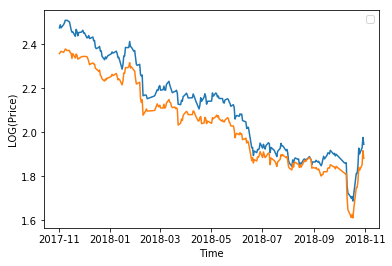

In [18]:
GY=train['000728.XSHE'] #取对数后的train训练集中国元证券和东吴证券走势相近
DW=train['601555.XSHG']  #东吴证券
plot(GY);plot(DW)
plt.xlabel('Time');plt.ylabel('LOG(Price)')
plt.legend(['000728.XSHE'],['601555.XSHG'],loc='best')

In [21]:
#综上可以看到  东吴证券和长江证券一阶单整  可以做协整检验
import statsmodels.api as sm           #协整检验  先做一元回归   再对残差做单位根检验
import seaborn as sns
x = train['000728.XSHE']
y = train['601555.XSHG']
X = sm.add_constant(x)
result = (sm.OLS(y,X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            601555.XSHG   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          1.02e-249
Time:                        16:29:29   Log-Likelihood:                 630.83
No. Observations:                 244   AIC:                            -1258.
Df Residuals:                     242   BIC:                            -1251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1685      0.012     14.590      

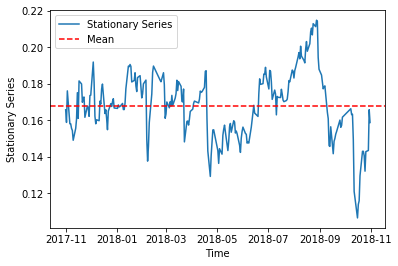

In [22]:
plot(y-0.8858*x);              #根据ols的估计系数，画出y-0.8858*x的平稳序列
plt.axhline((y-0.8858*x).mean(), color="red", linestyle="--")
plt.xlabel("Time"); plt.ylabel("Stationary Series")
plt.legend(["Stationary Series", "Mean"])

In [23]:
from statsmodels.tsa.stattools import adfuller        #单位根检验P<0.05 说明平稳
adftest=adfuller(y-0.8858*x-0.1575)                   #东吴证券和国元证券之间存在着长期的均衡关系
result=pd.Series(adftest[0:4],index=['Test Statistic','p-value','Lags Used','Numbers of Observations Used'])
for key,value in adftest[4].items():
    result['Critical Value (%s)'%key]=value
print(result)                                 #残差的单位根检验

Test Statistic                   -3.695034
p-value                           0.004184
Lags Used                         1.000000
Numbers of Observations Used    242.000000
Critical Value (1%)              -3.457664
Critical Value (5%)              -2.873559
Critical Value (10%)             -2.573175
dtype: float64


In [ ]:
####计算价差，训练模型

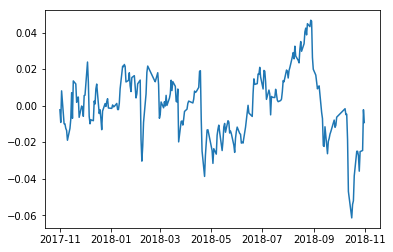

In [24]:
spread=y-0.8858*x-mean(y-0.8858*x)
plot(spread)

In [25]:
spread.head()

2017-11-01   -0.002285
2017-11-02   -0.009210
2017-11-03    0.008068
2017-11-06   -0.009945
2017-11-07   -0.009967
dtype: float64

In [26]:
spread.size

244

In [ ]:
####

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

X:[0.54705309 0.48305861 0.64272133 0.47626863 0.47606206 0.453027
 0.44254047 0.39288342 0.45299622 0.49969101],Y:0.6337127929877767
X:[0.48305861 0.64272133 0.47626863 0.47606206 0.453027   0.44254047
 0.39288342 0.45299622 0.49969101 0.63371279],Y:0.5037847069233881
X:[0.64272133 0.47626863 0.47606206 0.453027   0.44254047 0.39288342
 0.45299622 0.49969101 0.63371279 0.50378471],Y:0.6930372397045059
X:[0.47626863 0.47606206 0.453027   0.44254047 0.39288342 0.45299622
 0.49969101 0.63371279 0.50378471 0.69303724],Y:0.6776916820762862
X:[0.47606206 0.453027   0.44254047 0.39288342 0.45299622 0.49969101
 0.63371279 0.50378471 0.69303724 0.67769168],Y:0.5848583979316515
X:[0.453027   0.44254047 0.39288342 0.45299622 0.49969101 0.63371279
 0.50378471 0.69303724 0.67769168 0.5848584 ],Y:0.6088169533083699
X:[0.44254047 0.39288342 0.45299622 0.49969101 0.63371279 0.50378471
 0.69303724 0.67769168 0.5848584  0.60881695],Y:0.6115305872526232
X:[0.39288342 0.45299622 0.49969101 0.63371279 0.5

W1117 16:32:34.703022  2748 deprecation_wrapper.py:119] From d:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 189 samples, validate on 33 samples
Epoch 1/20
 - 3s - loss: 0.1458 - val_loss: 0.0371
Epoch 2/20
 - 1s - loss: 0.0372 - val_loss: 0.0412
Epoch 3/20
 - 1s - loss: 0.0278 - val_loss: 0.0333
Epoch 4/20
 - 1s - loss: 0.0300 - val_loss: 0.0404
Epoch 5/20
 - 1s - loss: 0.0259 - val_loss: 0.0451
Epoch 6/20
 - 1s - loss: 0.0205 - val_loss: 0.0494
Epoch 7/20
 - 1s - loss: 0.0208 - val_loss: 0.0441
Epoch 8/20
 - 1s - loss: 0.0191 - val_loss: 0.0404
Epoch 9/20
 - 0s - loss: 0.0186 - val_loss: 0.0401
Epoch 10/20
 - 1s - loss: 0.0185 - val_loss: 0.0472
Epoch 11/20
 - 1s - loss: 0.0195 - val_loss: 0.0441
Epoch 12/20
 - 1s - loss: 0.0194 - val_loss: 0.0470
Epoch 13/20
 - 1s - loss: 0.0148 - val_loss: 0.0360
Epoch 14/20
 - 1s - loss: 0.0155 - val_loss: 0.0373
Epoch 15/20
 - 1s - loss: 0.0129 - val_loss: 0.0391
Epoch 16/20
 - 0s - loss: 0.0144 - val_loss: 0.0359
Epoch 17/20
 - 0s - loss: 0.0165 - val_loss: 0.0381
Epoch 18/20
 - 0s - loss: 0.0160 - val_loss: 0.0366
Epoch 19/20
 - 0s - loss: 0.

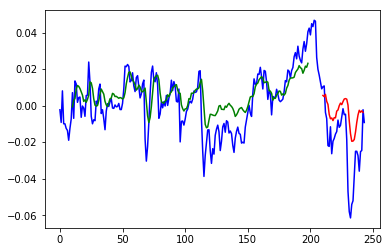

In [30]:
seed=7
batch_size=nest[0]
epochs=nest[1]    #迭代10次
filename=spread
footer=3
look_back=nest[2]   #用前十次的数据来预测下一时刻的数据 
lr=nest[3]
def create_dataset(dataset):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        x=dataset[i:i+look_back,0]
        dataX.append(x)
        y=dataset[i+look_back,0]
        dataY.append(y)
        print('X:%s,Y:%s'%(x,y))
    return np.array(dataX),np.array(dataY)

def build_model():
    model=Sequential()
    model.add(LSTM(units=nest[4],input_shape=(1,look_back),return_sequences=True))
    model.add(Dropout(nest[5]))
    model.add(LSTM(units=nest[6],return_sequences=False))
    model.add(Dropout(nest[7]))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

if __name__=='__main__':
    
    #设置随机数种子
    np.random.seed(seed)
    
    #导入数据
    data=filename
    dataset=data.values.astype('float64')
    
    #标准化数据
    scaler=MinMaxScaler()
    dataset=scaler.fit_transform(dataset.reshape(-1,1))
    train_size=len(dataset[0:200])    
    validation_size=len(dataset)-train_size
    train,validation=dataset[0: train_size, :],dataset[train_size:len(dataset), :]
    
    #创建dataset,让数据产生相关性
    X_train,y_train=create_dataset(train)
    X_validation,y_validation=create_dataset(validation)
    
    #将输入转化成【样本，时间步长，特征】
    X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
    X_validation=np.reshape(X_validation,(X_validation.shape[0],1,X_validation.shape[1]))
    
    #训练模型
    model=build_model()
    model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=2,validation_data=(X_validation,y_validation))
    
    #模型预测数据
    predict_train=model.predict(X_train)
    predict_validation=model.predict(X_validation)
    
    #反标准化数据，目的是保证MSE的准确性
    predict_train=scaler.inverse_transform(predict_train)
    y_train=scaler.inverse_transform([y_train])
    predict_validation=scaler.inverse_transform(predict_validation)
    y_validation=scaler.inverse_transform([y_validation])
    
    #评估模型
    train_score=math.sqrt(mean_squared_error(y_train[0],predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score=math.sqrt(mean_squared_error(y_validation[0],predict_validation[:, 0]))
    print('Validation Score: %.2f RMSE' % validation_score)
    
    #构建通过训练数据集进行预测的图表数据
    predict_train_plot=np.empty_like(dataset)
    predict_train_plot[:, :]=np.nan
    predict_train_plot[look_back:len(predict_train)+look_back, :]=predict_train
    
    #构建通过评估数据集进行预测的图表数据
    predict_validation_plot=np.empty_like(dataset)
    predict_validation_plot[:, :]=np.nan
    predict_validation_plot[len(predict_train)+look_back*2+1:len(dataset)-1, :]=predict_validation
    
    #图表显示
    dataset=scaler.inverse_transform(dataset)
    plt.plot(dataset,color='blue')
    plt.plot(predict_train_plot,color='green')
    plt.plot(predict_validation_plot,color='red')
    plt.show()

In [40]:
fx=test['000728.XSHE']            #测试集的价差
fy=test['601555.XSHG']
fspread=fy-0.8858*fx-mean(fy-0.8858*fx)

X:[0.06754794 0.10546446 0.09647042 0.10197825 0.15356653 0.11377202
 0.12728072 0.15264596 0.24825341 0.24378636],Y:0.26259149308345886
X:[0.10546446 0.09647042 0.10197825 0.15356653 0.11377202 0.12728072
 0.15264596 0.24825341 0.24378636 0.26259149],Y:0.23088488521459866
X:[0.09647042 0.10197825 0.15356653 0.11377202 0.12728072 0.15264596
 0.24825341 0.24378636 0.26259149 0.23088489],Y:0.04857721884427929
X:[0.10197825 0.15356653 0.11377202 0.12728072 0.15264596 0.24825341
 0.24378636 0.26259149 0.23088489 0.04857722],Y:0.04720230806939135
X:[0.15356653 0.11377202 0.12728072 0.15264596 0.24825341 0.24378636
 0.26259149 0.23088489 0.04857722 0.04720231],Y:0.06586687738573482
X:[0.11377202 0.12728072 0.15264596 0.24825341 0.24378636 0.26259149
 0.23088489 0.04857722 0.04720231 0.06586688],Y:0.07525684071138261
X:[0.12728072 0.15264596 0.24825341 0.24378636 0.26259149 0.23088489
 0.04857722 0.04720231 0.06586688 0.07525684],Y:0.06508768830576234
X:[0.15264596 0.24825341 0.24378636 0.262

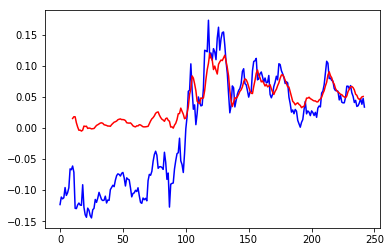

In [41]:
XY=fspread         #根据训练好的模型进行预测
dataset=XY.values.astype('float64')
#标准化数据
scaler=MinMaxScaler()
dataset=scaler.fit_transform(dataset.reshape(-1,1))
    
#创建dataset,让数据产生相关性
X_test,y_test=create_dataset(dataset)
    
#将输入转化成【样本，时间步长，特征】
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))


#模型预测数据
predict_test=model.predict(X_test)
    
#反标准化数据，目的是保证MSE的准确性
predict_test=scaler.inverse_transform(predict_test)
y_test=scaler.inverse_transform([y_test])
    
#评估模型
test_score=math.sqrt(mean_squared_error(y_test[0],predict_test[:, 0]))
print('Test Score: %.2f RMSE' % test_score)

#构建通过测试数据集进行预测的图表数据
predict_test_plot=np.empty_like(dataset)
predict_test_plot[:, :]=np.nan
predict_test_plot[look_back:len(predict_test)+look_back, :]=predict_test

#图表显示
dataset=scaler.inverse_transform(dataset)
plt.plot(dataset,color='blue')
plt.plot(predict_test_plot,color='red')
plt.show()

